In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
seed = 2022
np.random.seed(seed)
tf.random.set_seed(seed)

In [3]:
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [4]:
digits = load_digits()
digits_std = StandardScaler().fit_transform(digits.data)
y_onehot = to_categorical(digits.target)
X_train, X_test, Y_train, Y_test = train_test_split(
    digits_std, y_onehot, stratify=y_onehot, test_size=0.2, random_state=seed
)

In [5]:
digits.data.shape

(1797, 64)

In [6]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [74]:
del model

In [75]:
model = Sequential([
    Dense(100, input_dim=64, activation='relu'),
    Dense(93, activation='relu'),
    Dense(84, activation='relu'),
    Dense(10, activation='softmax')
])
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_59 (Dense)             (None, 100)               6500      
_________________________________________________________________
dense_60 (Dense)             (None, 93)                9393      
_________________________________________________________________
dense_61 (Dense)             (None, 84)                7896      
_________________________________________________________________
dense_62 (Dense)             (None, 10)                850       
Total params: 24,639
Trainable params: 24,639
Non-trainable params: 0
_________________________________________________________________


In [76]:
model.compile('adam', 'categorical_crossentropy', ['accuracy'])

In [77]:
mc = ModelCheckpoint('digit_best.h5py', monitor='val_loss',
                                        verbose=1, save_best_only=True)
es = EarlyStopping(patience=30)

In [78]:
hist = model.fit(X_train, Y_train, validation_split=0.2,
                            epochs=1000, batch_size=100, verbose=0,
                            callbacks=[mc, es])


Epoch 00001: val_loss improved from inf to 1.83502, saving model to digit_best.h5py
INFO:tensorflow:Assets written to: digit_best.h5py\assets

Epoch 00002: val_loss improved from 1.83502 to 1.17722, saving model to digit_best.h5py
INFO:tensorflow:Assets written to: digit_best.h5py\assets

Epoch 00003: val_loss improved from 1.17722 to 0.60045, saving model to digit_best.h5py
INFO:tensorflow:Assets written to: digit_best.h5py\assets

Epoch 00004: val_loss improved from 0.60045 to 0.36119, saving model to digit_best.h5py
INFO:tensorflow:Assets written to: digit_best.h5py\assets

Epoch 00005: val_loss improved from 0.36119 to 0.26223, saving model to digit_best.h5py
INFO:tensorflow:Assets written to: digit_best.h5py\assets

Epoch 00006: val_loss improved from 0.26223 to 0.21424, saving model to digit_best.h5py
INFO:tensorflow:Assets written to: digit_best.h5py\assets

Epoch 00007: val_loss improved from 0.21424 to 0.19310, saving model to digit_best.h5py
INFO:tensorflow:Assets written to

In [79]:
best_model = load_model('digit_best.h5py')
best_model.evaluate(X_test, Y_test)

360/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.05994543820205662, 0.9777778]

In [80]:
y_acc = hist.history['accuracy']
y_vloss = hist.history['val_loss']
xs = np.arange(1, len(y_acc) + 1)

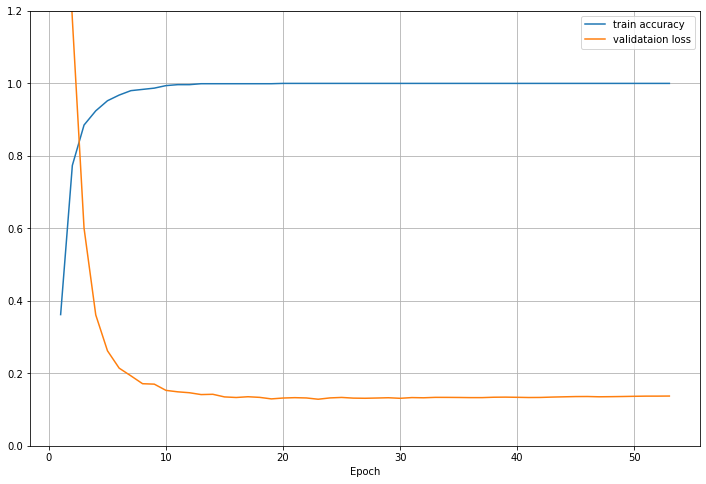

In [81]:
plt.figure(figsize=(12, 8))
plt.plot(xs, y_acc, label='train accuracy')
plt.plot(xs, y_vloss, label='validataion loss')
plt.legend(), plt.grid()
plt.ylim([0, 1.2])
plt.xlabel('Epoch')
plt.show()